# Ingeniería de características
La ingeniería de características busca como transformar apropiadamente aspectos identificados en valores númericos que permiten desarrollar modelos de aprendizaje automático o analisis de datos.

In [ ]:
# importar librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# leer el archivo de datos datos_perdidos.txt
datos = pd.read_csv('churn_clientes_bga.csv', sep=';')
# mostrar los primeros 5 registros
datos.head()

,ESTADO,MESES,INGRESOS,CASA_MTROS,GASTO,FRECUENCIA ANUAL,SATISFACCION,RANKING,PUNTOS acumuladO,LAT,LON
0,VINCULADO,27,7517963,85,1836515,151,88,14,8105,"7,119","-73,106771"
1,VINCULADO,25,6114069,765,1544217,19,"85,8",6,787,"7,1155","-73,108101"
2,VINCULADO,51,482856,372,2260488,169,"81,3",11,31,"7,1173","-73,1263"
3,RETIRADO,22,721790,161,1678195,156,"30,4",2,212,"7,1189","-73,126571"
4,RETIRADO,1,3315962,284,1211011,27,"87,7",2,146,"7,119","-73,119499"


### Descripción de la base de datos
* **ESTADO:** Estado del cliente.
* **MESES:** Meses de vinculación del cliente.
* **INGRESOS:** Ingresos anuales del cliente.
* **CASA_MTROS:** Área de la vivienda.
* **GASTOS:** Gasto anual del cliente.
* **FRECUENCIA ANUAL:** Frecuencia de compra.
* **SATISFACCION:** Puntuación de satisfacción del cliente.
* **RANKING:** Posición relativa del cliente.
* **PUNTOS acumuladO:** Puntos acumulados por el cliente.
* **LAT:** Latitud
* **LON:** Longitud

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ESTADO            1221 non-null   object
 1   MESES             1221 non-null   int64 
 2   INGRESOS          1221 non-null   int64 
 3   CASA_MTROS        1221 non-null   int64 
 4   GASTO             1221 non-null   int64 
 5   FRECUENCIA ANUAL  1221 non-null   int64 
 6   SATISFACCION      1221 non-null   object
 7   RANKING           1221 non-null   int64 
 8   PUNTOS acumuladO  1221 non-null   int64 
 9   LAT               1221 non-null   object
 10  LON               1221 non-null   object
dtypes: int64(7), object(4)
memory usage: 105.1+ KB


In [ ]:
# cambios necesarios
#reemplazar las comas por puntos en la columna 'SATISFACCION', 'LAT' Y 'LON'
datos['SATISFACCION'] = datos['SATISFACCION'].str.replace(',','.')
datos['LAT'] = datos['LAT'].str.replace(',','.')
datos['LON'] = datos['LON'].str.replace(',','.')
# cambiar los tipos de datos a float  a las columnas 'LAT', 'LON' y 'SATISFACCION'
datos['SATISFACCION'] = datos['SATISFACCION'].astype('float')
datos['LAT'] = datos['LAT'].astype('float')
datos['LON'] = datos['LON'].astype('float')

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ESTADO            1221 non-null   object 
 1   MESES             1221 non-null   int64  
 2   INGRESOS          1221 non-null   int64  
 3   CASA_MTROS        1221 non-null   int64  
 4   GASTO             1221 non-null   int64  
 5   FRECUENCIA ANUAL  1221 non-null   int64  
 6   SATISFACCION      1221 non-null   float64
 7   RANKING           1221 non-null   int64  
 8   PUNTOS acumuladO  1221 non-null   int64  
 9   LAT               1221 non-null   float64
 10  LON               1221 non-null   float64
dtypes: float64(3), int64(7), object(1)
memory usage: 105.1+ KB


## Numerización

Como vemos en la base de datos se tiene que el 'ESTADO' no es un valor numérico. Por esto vamos a revisar algunas estrategias para transformar estos datos a números.

In [ ]:
datos.ESTADO.unique()

array(['VINCULADO', 'RETIRADO'], dtype=object)

In [ ]:
# crear una columna con la transformacion de la columna 'ESTADO' por medio de una transformacion
# de one hot encoding
datos['ESTADO_one_hot_vin'] = datos['ESTADO'].apply(lambda x: 1 if x == 'VINCULADO' else 0)
datos['ESTADO_one_hot_ret'] = datos['ESTADO'].apply(lambda x: 1 if x == 'RETIRADO' else 0)

In [ ]:
datos.head()

,ESTADO,MESES,INGRESOS,CASA_MTROS,GASTO,FRECUENCIA ANUAL,SATISFACCION,RANKING,PUNTOS acumuladO,LAT,LON,ESTADO_one_hot_vin,ESTADO_one_hot_ret
0,VINCULADO,27,7517963,85,1836515,151,88.0,14,8105,7.1190,-73.106771,1,0
1,VINCULADO,25,6114069,765,1544217,19,85.8,6,787,7.1155,-73.108101,1,0
2,VINCULADO,51,482856,372,2260488,169,81.3,11,31,7.1173,-73.126300,1,0
3,RETIRADO,22,721790,161,1678195,156,30.4,2,212,7.1189,-73.126571,0,1
4,RETIRADO,1,3315962,284,1211011,27,87.7,2,146,7.1190,-73.119499,0,1


In [ ]:
datos_nuevos = datos.drop(columns=['ESTADO'])

In [ ]:
datos_nuevos.head()

,MESES,INGRESOS,CASA_MTROS,GASTO,FRECUENCIA ANUAL,SATISFACCION,RANKING,PUNTOS acumuladO,LAT,LON,ESTADO_one_hot_vin,ESTADO_one_hot_ret
0,27,7517963,85,1836515,151,88.0,14,8105,7.1190,-73.106771,1,0
1,25,6114069,765,1544217,19,85.8,6,787,7.1155,-73.108101,1,0
2,51,482856,372,2260488,169,81.3,11,31,7.1173,-73.126300,1,0
3,22,721790,161,1678195,156,30.4,2,212,7.1189,-73.126571,0,1
4,1,3315962,284,1211011,27,87.7,2,146,7.1190,-73.119499,0,1


In [ ]:
datos.corr()

<ipython-input-10-616d89d74c02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datos.corr()


,MESES,INGRESOS,CASA_MTROS,GASTO,FRECUENCIA ANUAL,SATISFACCION,RANKING,PUNTOS acumuladO,LAT,LON,ESTADO_one_hot_vin,ESTADO_one_hot_ret
MESES,1.000000,-0.013900,0.029862,0.027134,-0.052329,-0.031327,0.131941,-0.099074,0.050203,0.002263,0.181819,-0.181819
INGRESOS,-0.013900,1.000000,0.398899,-0.045415,-0.369570,-0.008697,0.455086,0.337454,-0.062238,0.394539,0.339013,-0.339013
CASA_MTROS,0.029862,0.398899,1.000000,-0.048496,-0.097471,0.000282,0.466740,0.171377,-0.045187,0.177528,0.225657,-0.225657
GASTO,0.027134,-0.045415,-0.048496,1.000000,0.040594,-0.024044,0.267254,0.017557,-0.149170,-0.193950,0.180842,-0.180842
FRECUENCIA ANUAL,-0.052329,-0.369570,-0.097471,0.040594,1.000000,-0.012819,-0.039730,0.039933,-0.544028,0.195171,-0.050031,0.050031
SATISFACCION,-0.031327,-0.008697,0.000282,-0.024044,-0.012819,1.000000,0.391982,0.037572,-0.000008,-0.021636,0.528796,-0.528796
RANKING,0.131941,0.455086,0.466740,0.267254,-0.039730,0.391982,1.000000,0.453766,0.050196,0.107593,0.748330,-0.748330
PUNTOS acumuladO,-0.099074,0.337454,0.171377,0.017557,0.039933,0.037572,0.453766,1.000000,-0.171033,0.245097,0.193211,-0.193211
LAT,0.050203,-0.062238,-0.045187,-0.149170,-0.544028,-0.000008,0.050196,-0.171033,1.000000,-0.394678,0.106767,-0.106767
LON,0.002263,0.394539,0.177528,-0.193950,0.195171,-0.021636,0.107593,0.245097,-0.394678,1.000000,0.049024,-0.049024


<ipython-input-11-0e78e3fb6203>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = datos.corr()


<Axes: >

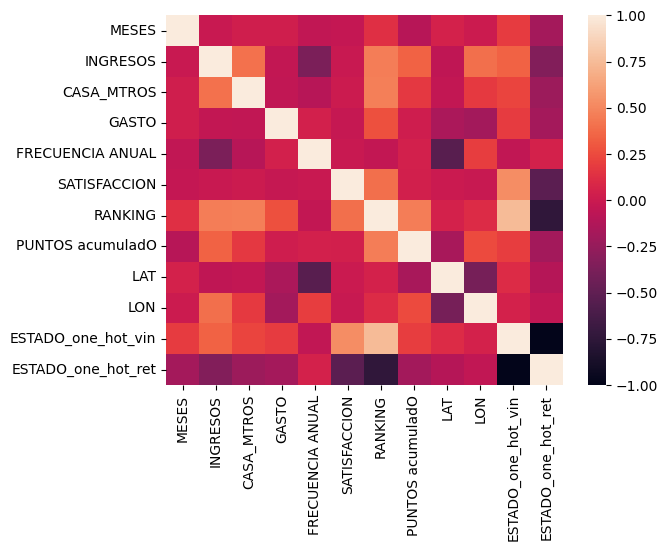

In [ ]:
# un analisis  que se puede hacer es la matriz de correlación entre columnas
# realizar una matriz de correlación entre columnas
corr = datos.corr()
# mostrar la matriz de correlación en un heatmap
sns.heatmap(corr, annot=False)

## Escalamiento

Escalar una variable se utiliza para igualar las escalas de variables.

In [ ]:
numeric_columns = ['MESES', 'INGRESOS', 'CASA_MTROS', 'GASTO',
       'FRECUENCIA ANUAL', 'SATISFACCION', 'RANKING', 'PUNTOS acumuladO']

In [ ]:
# crear un dataframe con las columnas numericas escaladas de 0 a 1
datos_numericos = datos[numeric_columns].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
datos_numericos.columns =['M', 'I', 'C', 'G', 'F', 'S', 'R', 'P']

<Axes: >

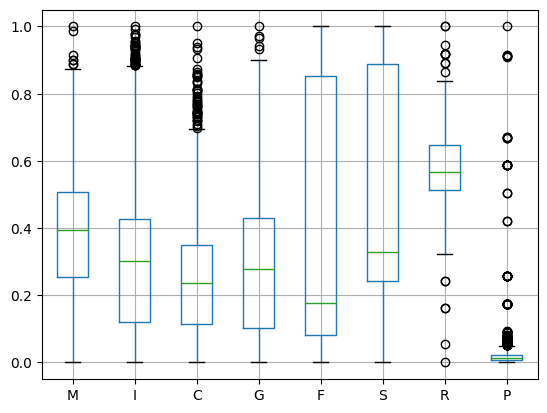

In [ ]:
# crear un grafico de boxplot para el dataframe de datos numericos
datos_numericos.boxplot()

## Normalización
Es un caso particular de escalamiento, en el cual se tiene otro nivel de escala aprox -3 a +3.

In [ ]:
datos_normalizados = datos[numeric_columns].apply(lambda x: (x - x.mean()) / (x.std()))
datos_normalizados.columns =['M', 'I', 'C', 'G', 'F', 'S', 'R', 'P']

<Axes: >

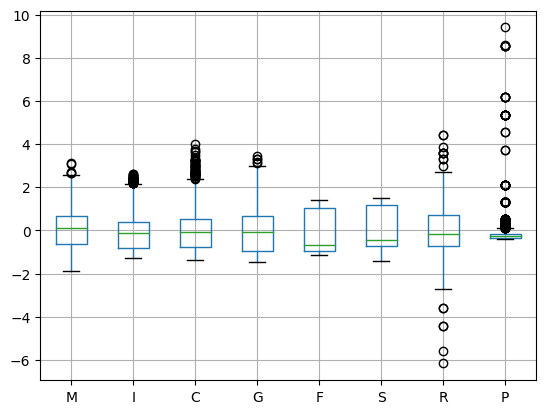

In [ ]:
# crear un grafico de boxplot para el dataframe de datos normalizados
datos_normalizados.boxplot()

In [ ]:
datos_normalizados.P.describe()

count    1.221000e+03
mean    -2.327740e-17
std      1.000000e+00
min     -3.870529e-01
25%     -3.279233e-01
50%     -2.525939e-01
75%     -1.578247e-01
max      9.417109e+00
Name: P, dtype: float64

In [ ]:
datos.describe()

,MESES,INGRESOS,CASA_MTROS,GASTO,FRECUENCIA ANUAL,SATISFACCION,RANKING,PUNTOS acumuladO,LAT,LON,ESTADO_one_hot_vin,ESTADO_one_hot_ret
count,1221.000000,1.221000e+03,1221.000000,1.221000e+03,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000
mean,26.665029,2.991569e+06,594.909910,1.296097e+06,83.426699,44.507535,5.517609,478.846847,7.131940,-73.124535,0.482391,0.517609
std,14.080157,2.199677e+06,375.872007,7.573282e+05,71.719437,31.287244,3.486375,1234.577727,0.012593,0.010272,0.499895,0.499895
min,0.000000,1.500000e+05,81.000000,2.000000e+05,1.000000,0.000000,-16.000000,1.000000,7.113368,-73.268400,0.000000,0.000000
25%,18.000000,1.187114e+06,314.000000,5.854990e+05,16.000000,22.200000,3.000000,74.000000,7.119448,-73.131514,0.000000,0.000000
50%,28.000000,2.762183e+06,561.000000,1.232408e+06,34.000000,30.000000,5.000000,167.000000,7.130270,-73.125973,0.000000,1.000000
75%,36.000000,3.828992e+06,786.000000,1.803032e+06,159.000000,81.000000,8.000000,284.000000,7.143022,-73.117396,1.000000,1.000000
max,71.000000,8.785634e+06,2105.000000,3.920445e+06,186.000000,91.100000,21.000000,12105.000000,7.155957,-73.105382,1.000000,1.000000


In [ ]:
datos.columns

Index(['ESTADO', 'MESES', 'INGRESOS', 'CASA_MTROS', 'GASTO',
       'FRECUENCIA ANUAL', 'SATISFACCION', 'RANKING', 'PUNTOS acumuladO',
       'LAT', 'LON', 'ESTADO_one_hot_vin', 'ESTADO_one_hot_ret'],
      dtype='object')

<Axes: >

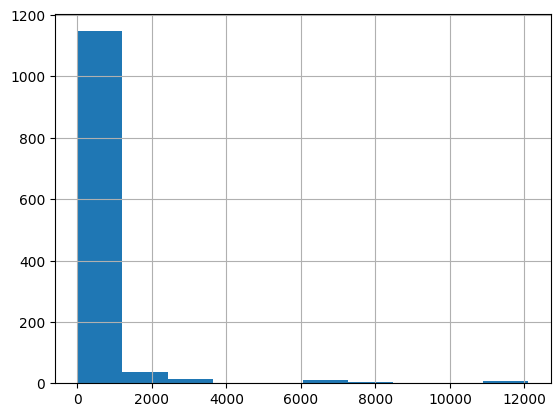

In [ ]:
datos['PUNTOS acumuladO'].hist()

Como se pudo ver en la grafica de arriba hay datos que estan vacios por lo cual, se deben usar estrategias para colocarlos en rangos. las estrategias usadas son:

In [ ]:
valores_normales = datos[['PUNTOS acumuladO','RANKING']].values

In [ ]:
valores_normales.shape

(1221, 2)

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
transform = KBinsDiscretizer(n_bins = 4,strategy='uniform',encode='ordinal',subsample=None)

In [ ]:
puntos_uniform =  transform.fit_transform(valores_normales)

In [ ]:
datos_discretos = pd.DataFrame(puntos_uniform,columns=['Puntos','RANKING'])

array([[<Axes: title={'center': 'Puntos'}>,
        <Axes: title={'center': 'RANKING'}>]], dtype=object)

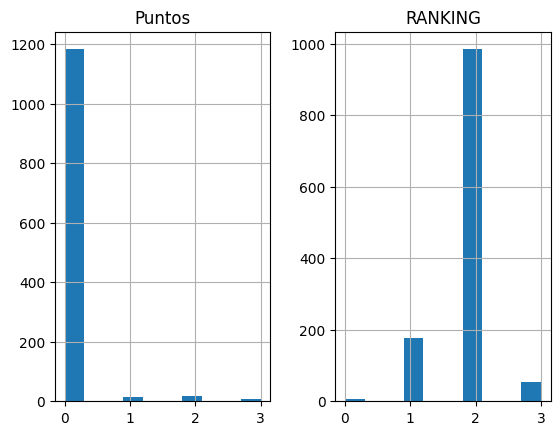

In [ ]:
datos_discretos.hist()

In [ ]:
transform = KBinsDiscretizer(n_bins = 4,strategy='quantile',encode='ordinal',subsample=None)

In [ ]:
puntos_uniform =  transform.fit_transform(valores_normales)

In [ ]:
datos_discretos = pd.DataFrame(puntos_uniform,columns=['Puntos','RANKING'])

array([[<Axes: title={'center': 'Puntos'}>,
        <Axes: title={'center': 'RANKING'}>]], dtype=object)

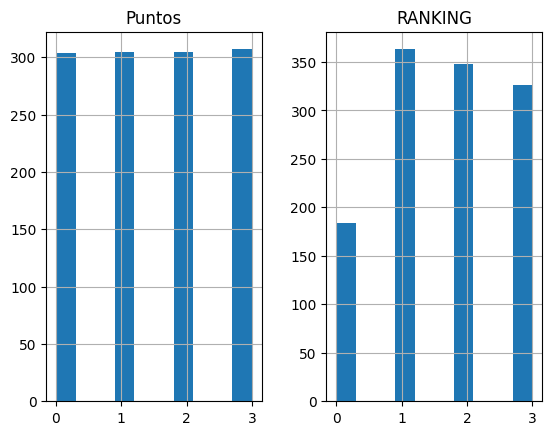

In [ ]:
datos_discretos.hist()

In [ ]:
transform = KBinsDiscretizer(n_bins = 4,strategy='kmeans',encode='ordinal',subsample=None)

In [ ]:
puntos_uniform =  transform.fit_transform(valores_normales)

In [ ]:
datos_discretos = pd.DataFrame(puntos_uniform,columns=['Puntos','RANKING'])

array([[<Axes: title={'center': 'Puntos'}>,
        <Axes: title={'center': 'RANKING'}>]], dtype=object)

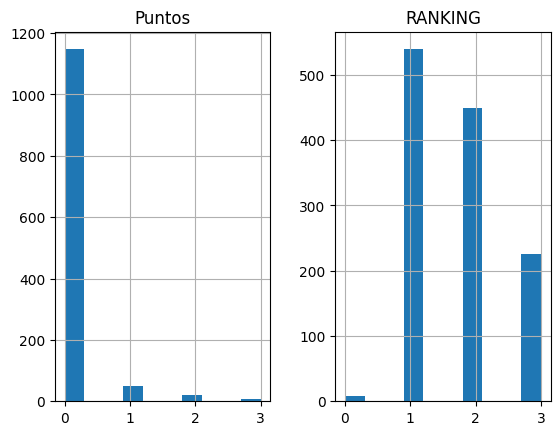

In [ ]:
datos_discretos.hist()